In [2]:
from pds4_tools import pds4_read       # to read and inspect the data and metadata
import matplotlib.pyplot as plt        # for plotting
import matplotlib
import numpy as np
from PIL import Image

# for plotting in Jupyter notebooks
%matplotlib notebook

from skimage import exposure
from skimage import data, img_as_float
import colour
from colour.plotting import *
import glob

from colour_demosaicing import (
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

cctf_encoding = colour.cctf_encoding
_ = colour.utilities.filter_warnings()
# colour.utilities.describe_environment();

In [3]:
def read_pds(path):
    data = pds4_read(path, quiet=True)
    img = np.array(data[0].data)
    img = img_as_float(img)
    return img

In [4]:
def debayer_img(img, CFA='RGGB'):
    # Menon2007 yields better edges than bilinear
    debayered = cctf_encoding(demosaicing_CFA_Bayer_Menon2007(img, CFA))
    return debayered

In [5]:
def stretch_img(img):
    # cf https://www.harrisgeospatial.com/docs/BackgroundStretchTypes.html
    # this is a 2 percent linear stretch
    p2, p98 = np.percentile(img, (2, 98))
    img = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img

In [6]:
def plot_img_and_hist(image, hist=True, bins=128):
    """Plot an image along with its histogram.
    """
    if hist:
        fig, axes = plt.subplots(2,1, figsize=(10,10), gridspec_kw={'height_ratios': [3, 1]})
        ax_img, ax_hist = axes
    else:
        fig, ax_img = plt.subplots(figsize=(10,10))

    # Display image
    ax_img.imshow(image, cmap='gray')
    ax_img.set_axis_off()

    if hist:
        # Display histogram
        ax_hist.hist(image[:,:,0].ravel(), bins=bins, histtype='step', color='red')
        ax_hist.hist(image[:,:,1].ravel(), bins=bins, histtype='step', color='green')
        ax_hist.hist(image[:,:,2].ravel(), bins=bins, histtype='step', color='blue')

        ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
        ax_hist.set_xlabel('Pixel intensity')
        ax_hist.set_xlim(0, 1)
        ax_hist.set_yticks([])

In [7]:
def export_img(name, img):
    pil_img = Image.fromarray(np.uint8(img*255))
    pil_img.save(name)

# TCAM 2C color data

## TCAM duplicated image

Processing label: /Users/siyu/TEMP/ChangE_4_data/TCAM/CE4_GRAS_TCAM-I-143_SCI_N_20190111195709_20190111195709_0009_A.2CL
Now processing a Array_3D_Image structure: ARRAY_0
Processing label: /Users/siyu/TEMP/ChangE_4_data/TCAM/CE4_GRAS_TCAM-I-144_SCI_N_20190111195711_20190111195711_0009_A.2CL
Now processing a Array_3D_Image structure: ARRAY_0


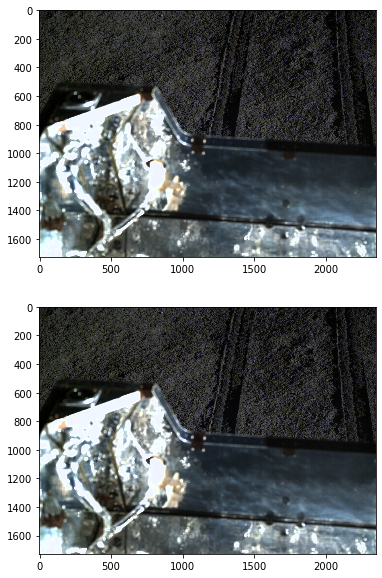

In [7]:
p = '/Users/siyu/TEMP/ChangE_4_data/TCAM/CE4_GRAS_TCAM-I-143_SCI_N_20190111195709_20190111195709_0009_A.2CL'
d1 = pds4_read(p)

p = '/Users/siyu/TEMP/ChangE_4_data/TCAM/CE4_GRAS_TCAM-I-144_SCI_N_20190111195711_20190111195711_0009_A.2CL'
d2 = pds4_read(p)

fig, axes = plt.subplots(2,1,figsize=(10,10))
img1 = np.array(d1[0].data)
img2 = np.array(d2[0].data)

axes[0].imshow(img1, cmap='gray')
axes[1].imshow(img2, cmap='gray')

In [8]:
d1.label.to_dict()['Product_Observational']

OrderedDict([('Identification_Area',
              OrderedDict([('logical_identifier',
                            'CE4_GRAS_TCAM-I-143_SCI_N_20190111195709_20190111195709_0009_A.2C'),
                           ('version_id', '1.0'),
                           ('title', "Chang'E 4(CE-4) mission"),
                           ('information_model_version', '1.5.0.0'),
                           ('product_class', 'Product_Observational'),
                           ('Modification_History',
                            OrderedDict([('Modification_Detail',
                                          OrderedDict([('modification_date',
                                                        '2019-01-03'),
                                                       ('version_id', '1.0'),
                                                       ('description',
                                                        'None')]))]))])),
             ('Reference_List', 'None'),
             ('Observation_Area

## Play with data header

In [32]:
CAM_DIR = 'PCAM'
yawing = []
for p in sorted(glob.glob(f'{CAM_DIR}/*.*L')):
    if '0067' in p and 'PCAML' in p:
        d = pds4_read(p, quiet=True)
        print(p)
        lbl = d.label.to_dict()['Product_Observational']['Observation_Area']['Mission_Area']['Rotation_Angle']
        print(lbl)

PCAM/CE4_GRAS_PCAML-C-000_SCI_N_20190905071818_20190905071818_0067_B.2BL
OrderedDict([('pitch', '-23.907715'), ('yawing', '-12.898743'), ('description', 'Mast_Pointing_Instrument')])
PCAM/CE4_GRAS_PCAML-C-001_SCI_N_20190905071947_20190905071947_0067_B.2BL
OrderedDict([('pitch', '-23.907715'), ('yawing', '-0.087891'), ('description', 'Mast_Pointing_Instrument')])
PCAM/CE4_GRAS_PCAML-C-002_SCI_N_20190905072116_20190905072116_0067_B.2BL
OrderedDict([('pitch', '-23.907715'), ('yawing', '12.876762'), ('description', 'Mast_Pointing_Instrument')])
PCAM/CE4_GRAS_PCAML-C-003_SCI_N_20190905072359_20190905072359_0067_B.2BL
OrderedDict([('pitch', '-35.883545'), ('yawing', '12.876762'), ('description', 'Mast_Pointing_Instrument')])
PCAM/CE4_GRAS_PCAML-C-004_SCI_N_20190905072528_20190905072528_0067_B.2BL
OrderedDict([('pitch', '-35.883545'), ('yawing', '0.109870'), ('description', 'Mast_Pointing_Instrument')])
PCAM/CE4_GRAS_PCAML-C-005_SCI_N_20190905072657_20190905072657_0067_B.2BL
OrderedDict([('pi

In [10]:
CAM_DIR = 'TCAM'
for p in sorted(glob.glob(f'{CAM_DIR}/*.*L')):
    if '0004' in p:
        d = pds4_read(p)
        img = np.array(d[0].data)
#         print(np.percentile(img, [2,50,98]))
        lbl = d.label.to_dict()['Product_Observational']['Observation_Area']['Mission_Area']['Rotation_Angle']
        print(lbl)
        print()

Processing label: TCAM/CE4_GRAS_TCAM-I-002_SCI_N_20190106033401_20190106033401_0004_A.2CL
Now processing a Array_3D_Image structure: ARRAY_0
OrderedDict([('mast_angel_pitch', '0.000000'), ('mast_angel_yaw', '170.000000')])

Processing label: TCAM/CE4_GRAS_TCAM-I-003_SCI_N_20190106033403_20190106033403_0004_A.2CL
Now processing a Array_3D_Image structure: ARRAY_0
OrderedDict([('mast_angel_pitch', '0.000000'), ('mast_angel_yaw', '170.000000')])

Processing label: TCAM/CE4_GRAS_TCAM-I-004_SCI_N_20190106033405_20190106033405_0004_A.2CL
Now processing a Array_3D_Image structure: ARRAY_0
OrderedDict([('mast_angel_pitch', '0.000000'), ('mast_angel_yaw', '152.000000')])

Processing label: TCAM/CE4_GRAS_TCAM-I-005_SCI_N_20190106033407_20190106033407_0004_A.2CL
Now processing a Array_3D_Image structure: ARRAY_0
OrderedDict([('mast_angel_pitch', '0.000000'), ('mast_angel_yaw', '152.000000')])

Processing label: TCAM/CE4_GRAS_TCAM-I-006_SCI_N_20190106033410_20190106033410_0004_A.2CL
Now processing

## TCAM weird color at boarders

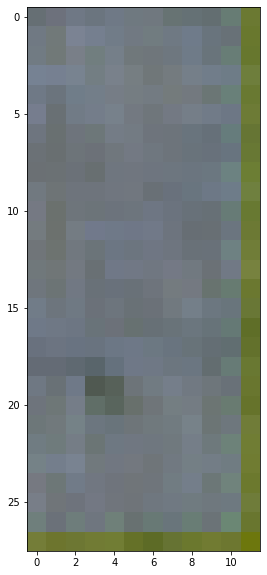

In [22]:
p = '/Users/siyu/Downloads/CE4_GRAS_TCAM-I-078_SCI_N_20190106043527_20190106043527_0004_A.2CL'
img = read_pds(p)
fig, ax_img = plt.subplots(figsize=(10,10))
ax_img.imshow(img[1700:,2340:,:], cmap='gray')

# plot_img_and_hist(img[2300:,:], hist=True)
# plt.show()
# export_img(f"t.png", img)

In [14]:
np.power(np.array([1,2,3]),2)

array([1, 4, 9])

In [12]:
pow([1,2,3], 2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

(1728, 2352)


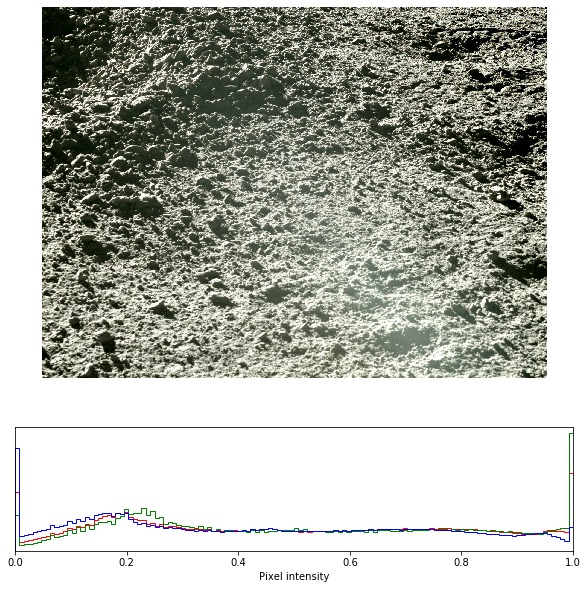

In [22]:
p = 'PCAM/CE4_GRAS_PCAML-C-000_SCI_N_20190806113452_20190806113452_0053_B.2BL'
img = read_pds(p)
print(img.shape)
img = np.power(img,1/2.2)
debayered = debayer_img(img)
# final = stretch_img(debayered)
plot_img_and_hist(final, hist=True)
plt.show()
export_img(f"g22.png", final)

(1728, 2352)


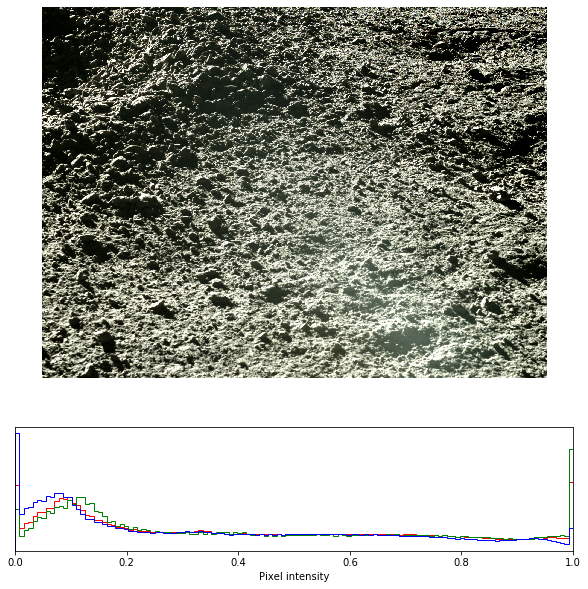

In [23]:
p = 'PCAM/CE4_GRAS_PCAML-C-000_SCI_N_20190806113452_20190806113452_0053_B.2BL'
img = read_pds(p)
print(img.shape)
# np.power(img,1/2.2)
debayered = debayer_img(img)
final = stretch_img(debayered)
plot_img_and_hist(final, hist=True)
plt.show()
export_img(f"g1.png", final)